# LAB9 - Unsupervised Learning - PCA


**PCA represents new dimensions that capture the most variance in your original dataset, enabling dimensionality reduction while retaining important information.**

- [1: Principal Component Analysis](#1:-Principal-Component-Analysis)
- [2:  NCI60 Data Example](#2:-NCI60-Data-Example)

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


%matplotlib inline
# plt.style.use('seaborn-white')

##  1: Principal Component Analysis

The rows of the data set contain the 50 states, in
alphabetical order
The columns of the data set contain the four variables.

In [2]:
df = pd.read_csv('USArrests.csv', index_col=0) # each row will be labeled with the corresponding state name
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


We first brifey examine the data. We notice that the variables have vastly different means.

In [3]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

 We see that there are on average three times as many
rapes as murders, and more than eight times as many assaults as rapes

We can also examine the variances of the four variables

In [4]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Not surprisingly, the variables also have vastly different variances: the UrbanPop variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number
of rapes in each state per 100,000 individuals. 

If we failed to scale the variables before performing PCA, then most of the principal components that we observed would be driven by the Assault variable, since it has by far the largest mean and variance. 

Thus, it is important to standardize the variables to have mean zero and standard deviation one before performing PCA.

In [5]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


We now perform principal components analysis

In [6]:
pca1=PCA().fit(X)

**Shape of pca components is (n_components, n_features) where n_componentsis the min minimum of the number of samples and features**

Show the principal component loadings; each column contains the corresponding principal component loading vector

In [7]:
# The loading vectors
pca_loadings = pd.DataFrame(pca1.components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


**V1 has 0.536 which indicates it contributes significantly to Murder.** higher value means higher importance

**V2 has inverse relationship with Murder**

We see that there are four distinct principal components. This is to be expected because there are in general min(n − 1; p) informative principal components in a data set with n observations and p variables.

In [8]:
X.shape

(50, 4)

In [9]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996
Colorado,1.514563,0.987555,1.095007,-0.001465
Connecticut,-1.358647,1.088928,-0.643258,0.118469
Delaware,0.047709,0.325359,-0.718633,0.881978
Florida,3.013042,-0.039229,-0.576829,0.096285
Georgia,1.639283,-1.278942,-0.342460,-1.076797


We can plot the first two principal components as follows:

C:\Users\jawad\AppData\Local\Temp\ipykernel_27372\1119103770.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
C:\Users\jawad\AppData\Local\Temp\ipykernel_27372\1119103770.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
C:\Users\jawad\AppData\Local\Temp\ipykernel_27372\1119103770.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

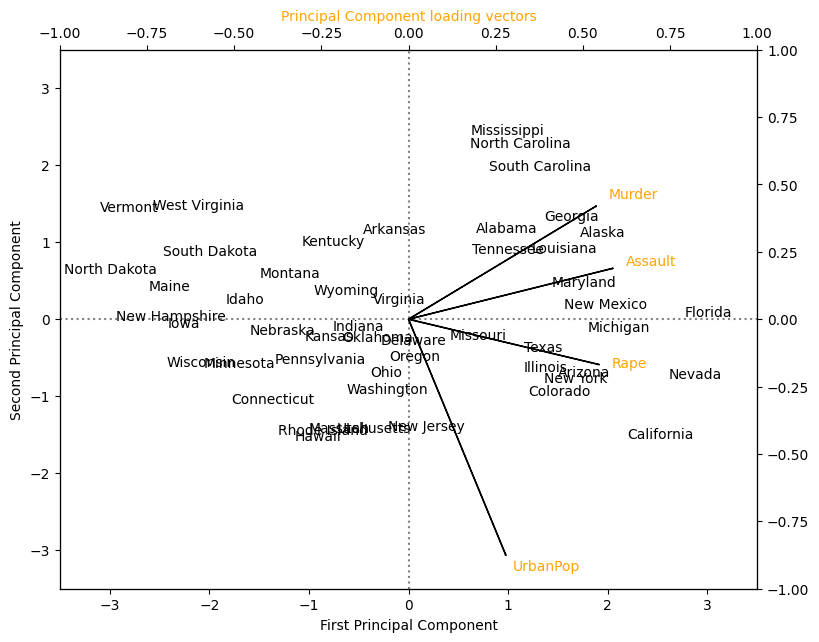

In [17]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
plt.show()

In [11]:
# Standard deviation of the four principal components
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [12]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [13]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains 62.0% of the variance in the data, the next principal component explains 24.7% of the variance, and so forth.

We can plot the Proportion of Variance Explained PVE explained by each component, as well as the cumulative PVE, as follows:

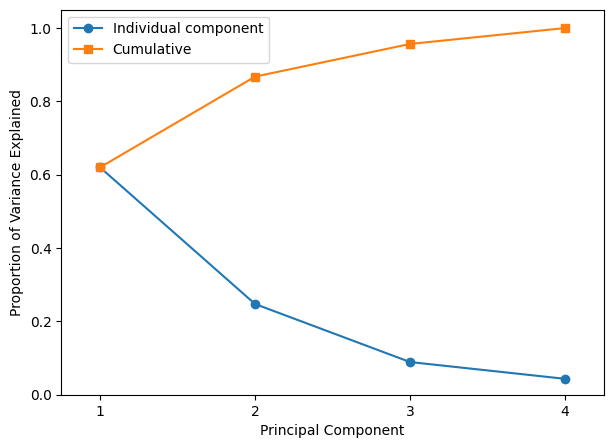

In [16]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);
plt.show()

## 2: NCI60 Data Example

### PCA
Apply PCA one the attached NC160 dataset
similar to what we did in the lab
